# Gera gráficos em grid separado pelo dir0.1 e dir1.0


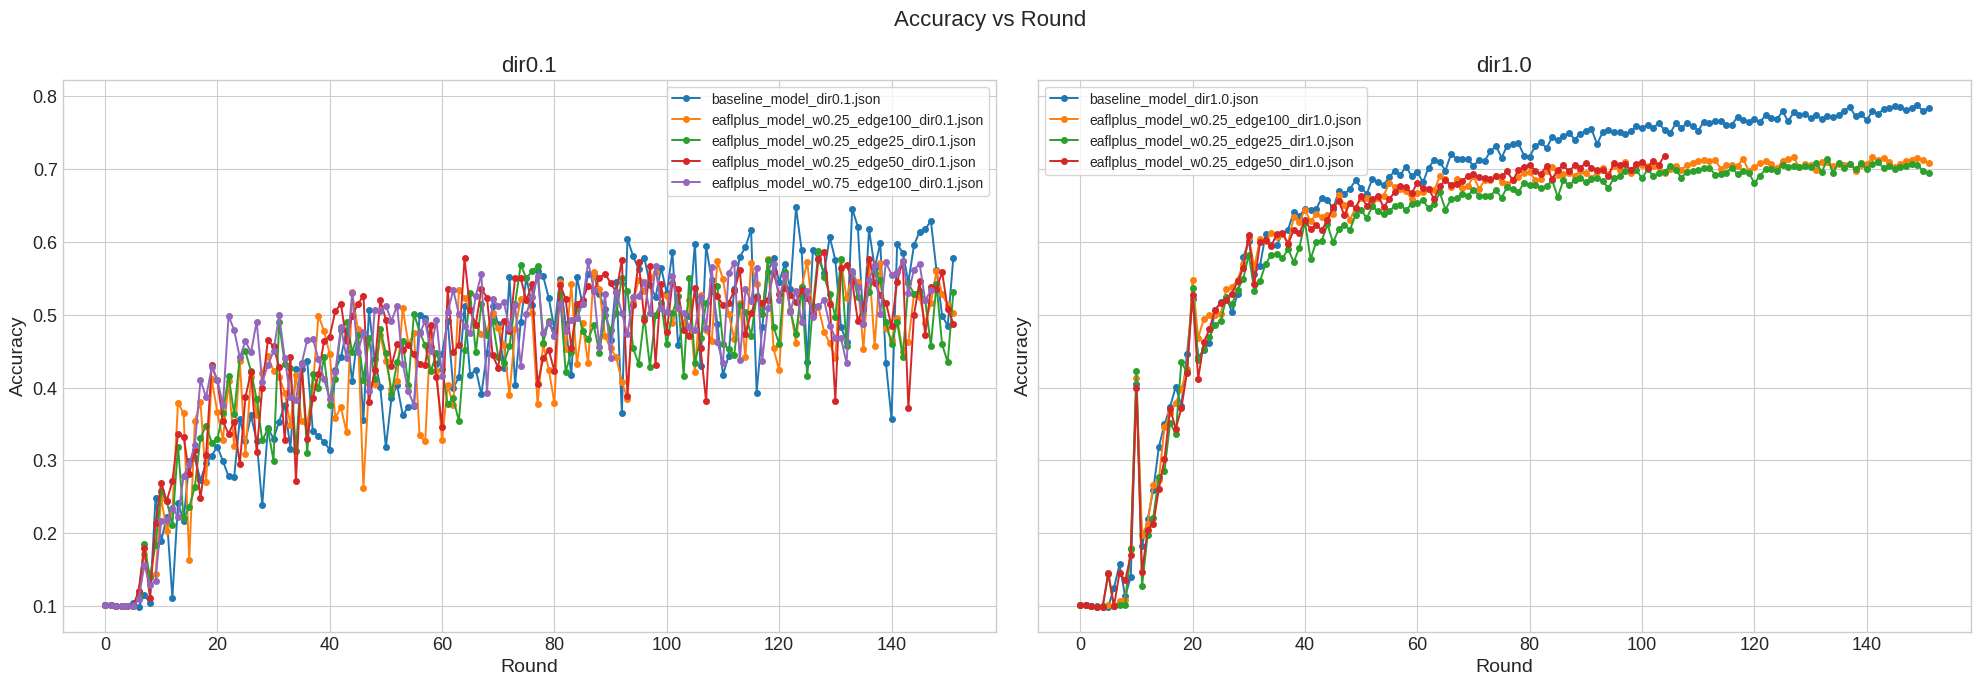

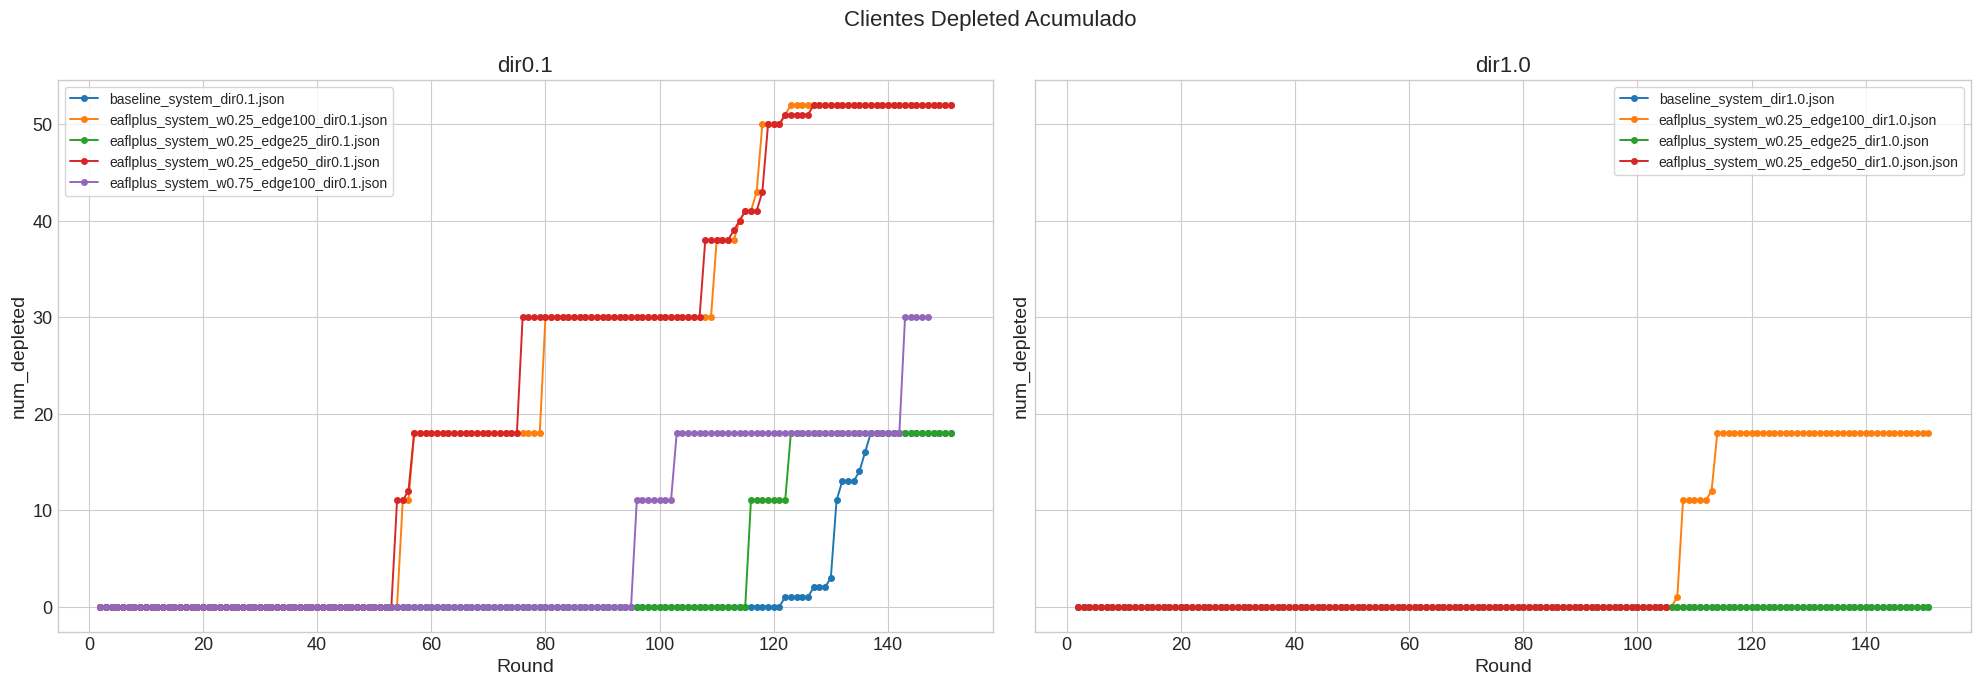

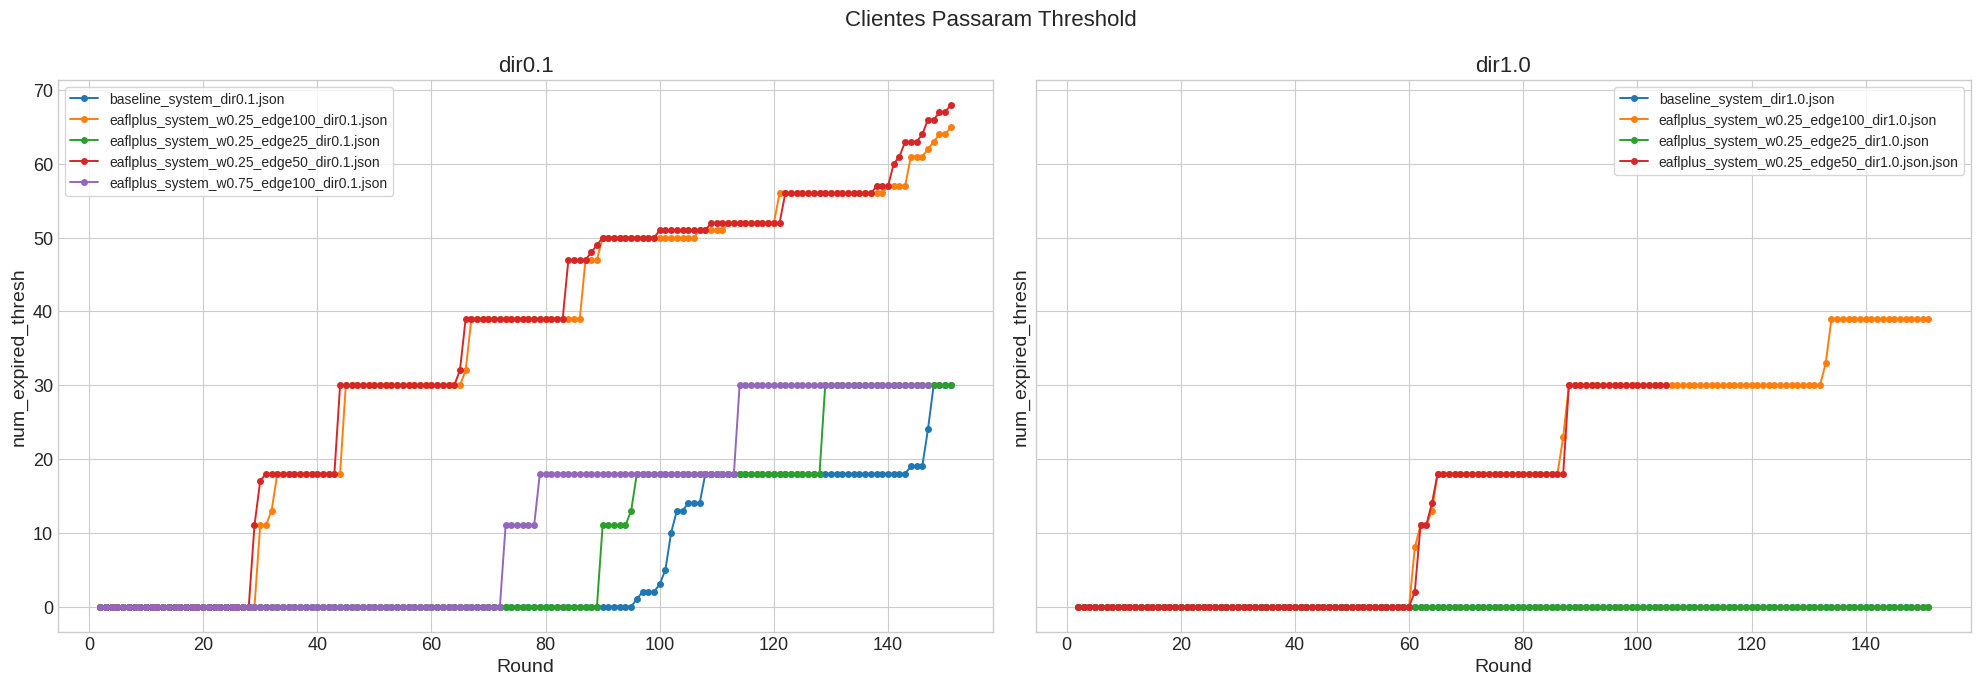

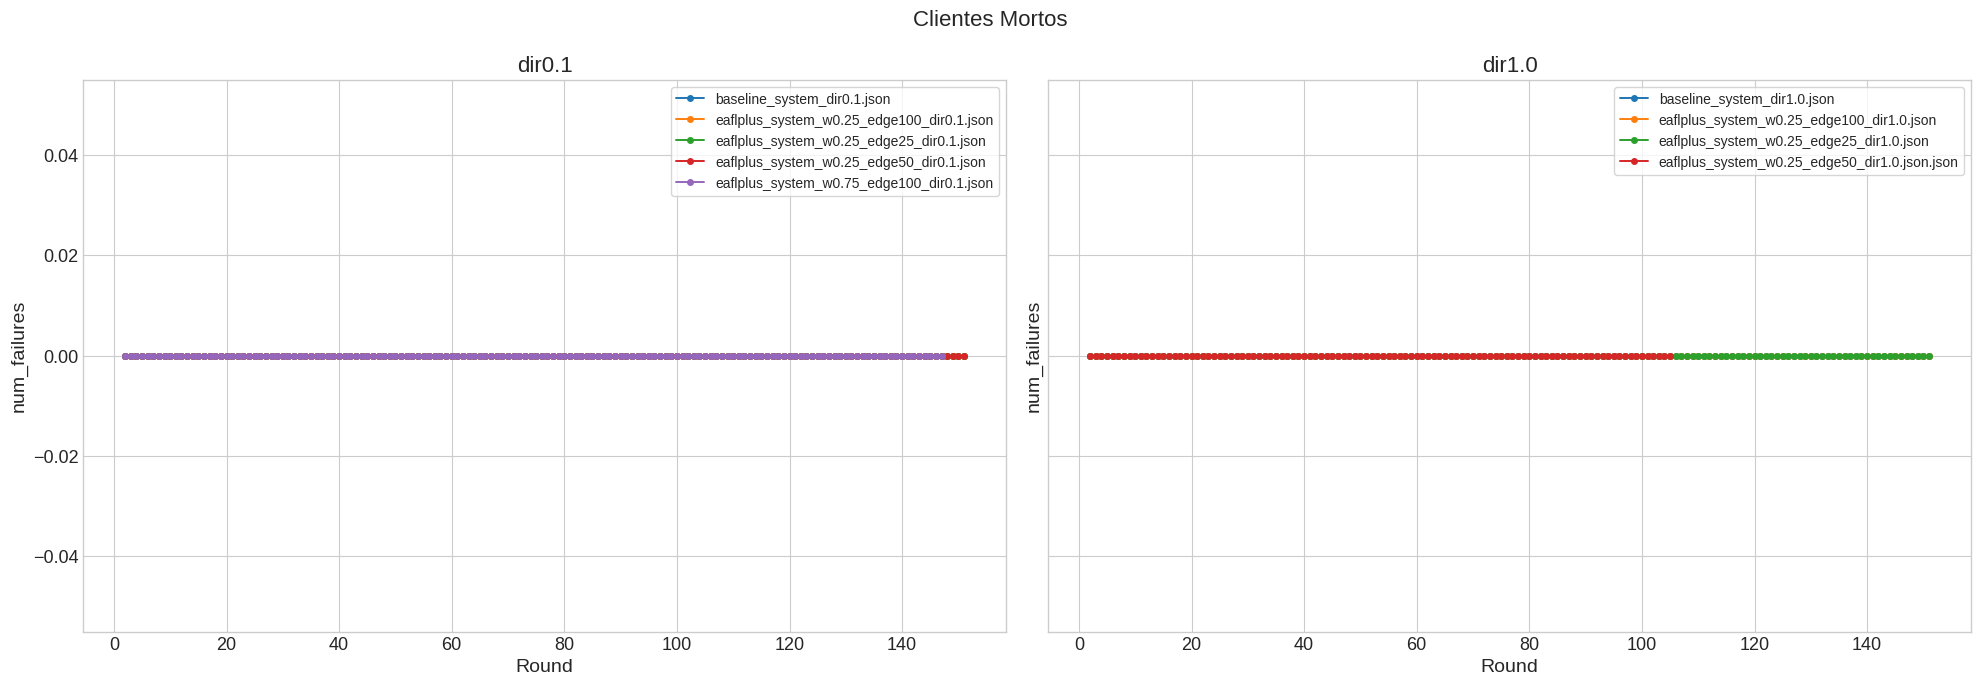

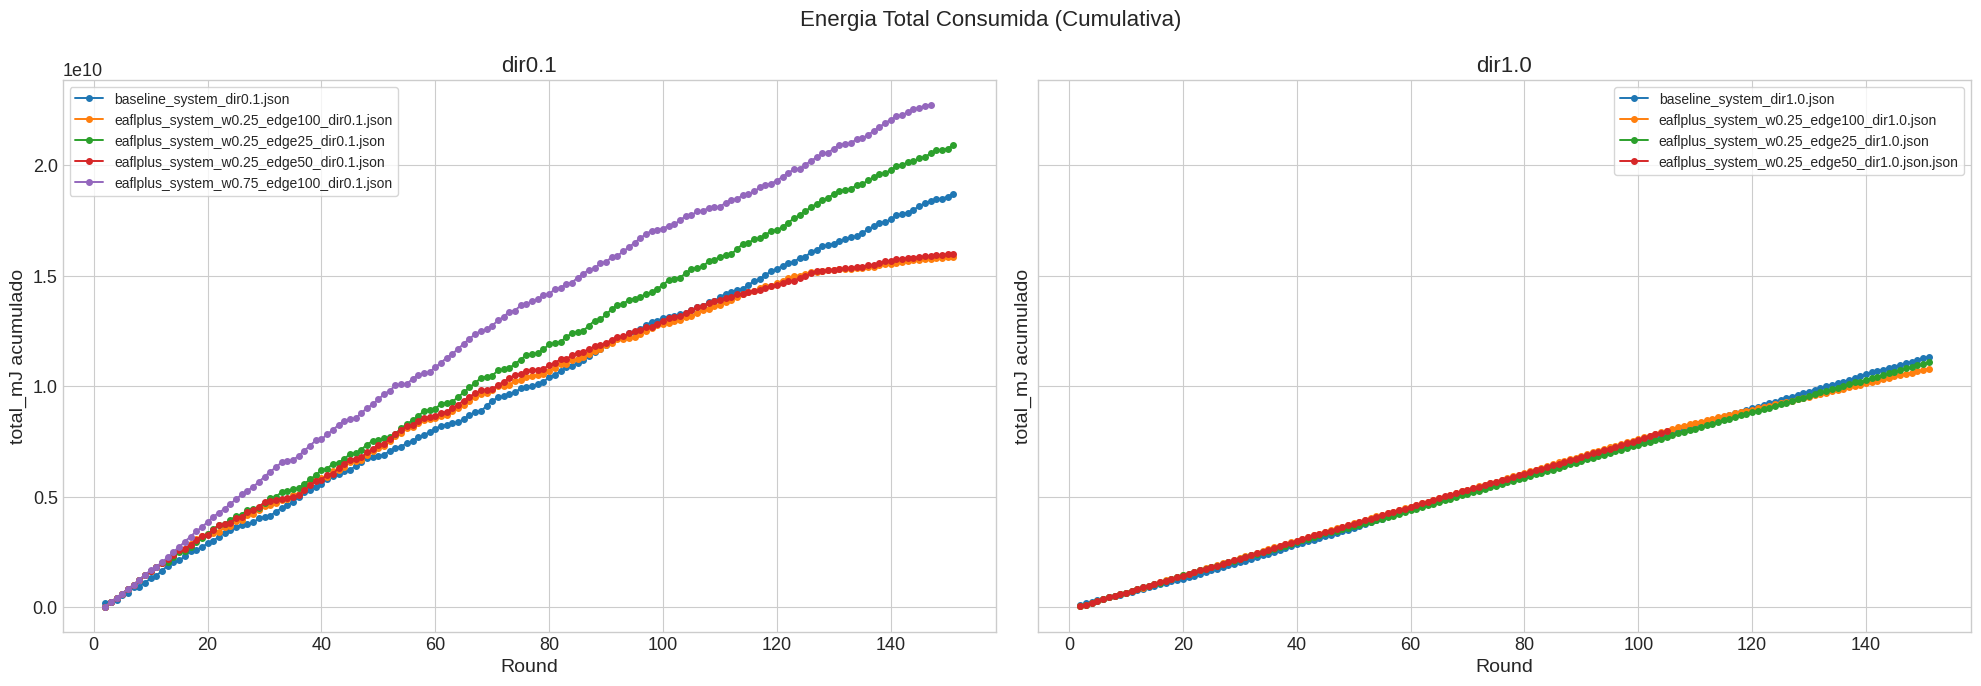

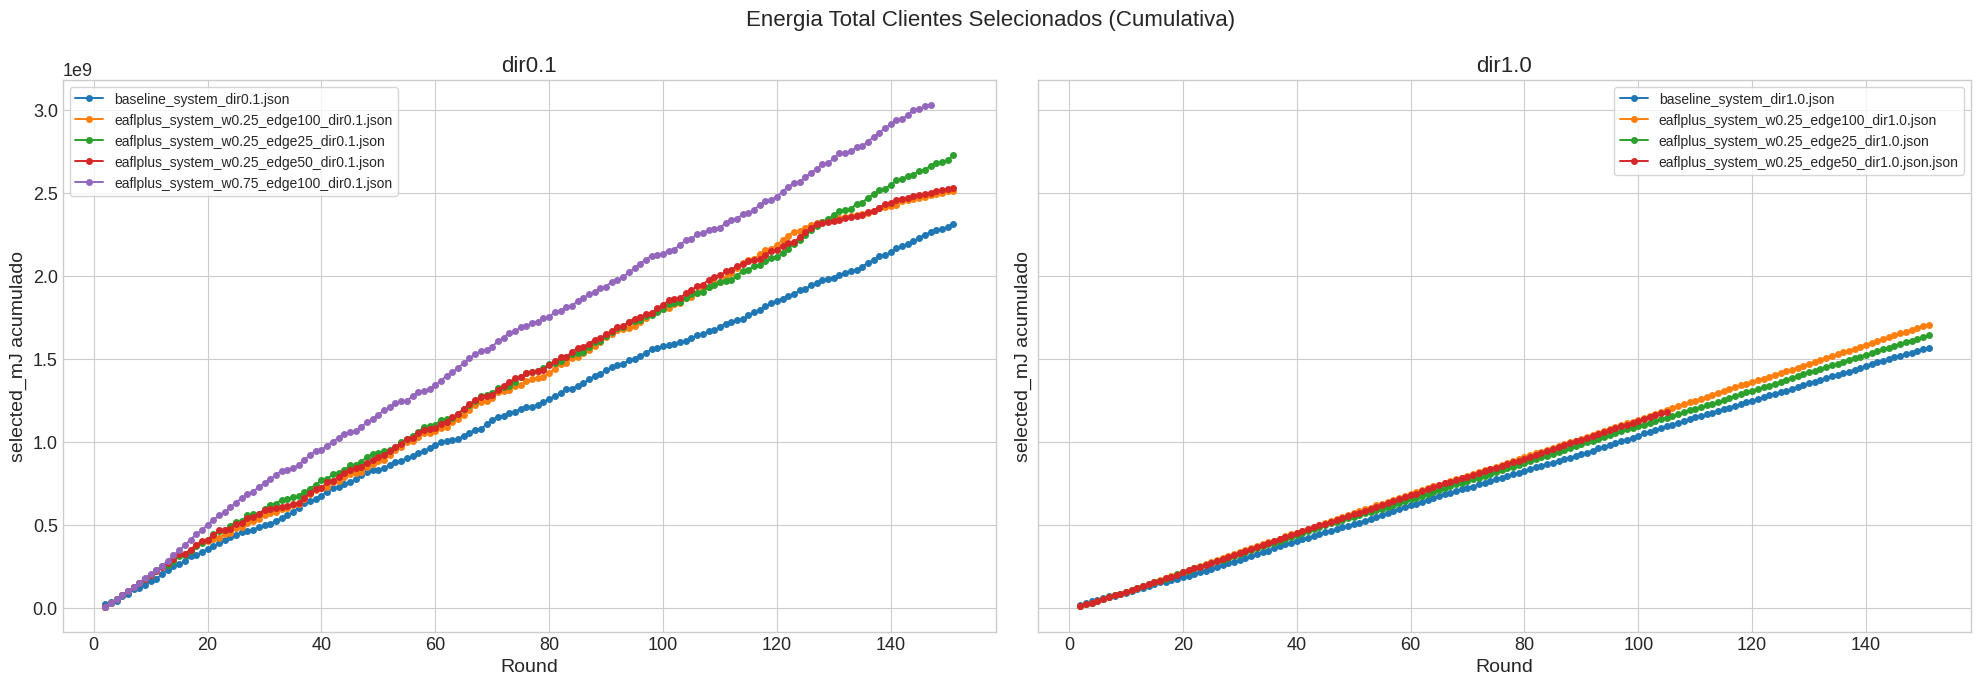

In [5]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np

plt.style.use('seaborn-v0_8-whitegrid')

plt.rcParams['figure.figsize'] = (12, 5)
plt.rcParams['lines.linewidth'] = 1.4
plt.rcParams['lines.markersize'] = 4
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10


def load(fname):
    with open(fname) as f:
        return json.load(f)



files = [f for f in os.listdir(".") if f.endswith(".json")]

model_files = [f for f in files if "model" in f.lower()]
system_files = [f for f in files if "system" in f.lower()]

models_01 = [(load(f), f) for f in sorted(model_files) if "dir0.1" in f]
models_10 = [(load(f), f) for f in sorted(model_files) if "dir1.0" in f]

systems_01 = [(load(f), f) for f in sorted(system_files) if "dir0.1" in f]
systems_10 = [(load(f), f) for f in sorted(system_files) if "dir1.0" in f]



def plot_metric_two_panels(list_01, list_10, title, ylabel, key):

    fig, axes = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
    panel_data = [(list_01, "dir0.1"), (list_10, "dir1.0")]

    for ax, (data_list, panel_title) in zip(axes, panel_data):

        for data, fname in data_list:
            rounds = sorted(int(k) for k in data.keys())
            values = [data[str(r)][key] for r in rounds]

            if key in ("total_mJ", "selected_mJ"):
                values = np.cumsum(values)

            ax.plot(rounds, values, marker="o", label=fname)

        ax.set_title(panel_title)
        ax.set_xlabel("Round")
        ax.set_ylabel(ylabel)
        ax.legend(frameon=True)

    fig.suptitle(title, fontsize=16)
    plt.tight_layout()
    plt.show()




plot_metric_two_panels(models_01, models_10,
                       "Accuracy vs Round",
                       "Accuracy",
                       "cen_accuracy")

plot_metric_two_panels(systems_01, systems_10,
                       "Clientes Depleted Acumulado",
                       "num_depleted",
                       "num_depleted")

plot_metric_two_panels(systems_01, systems_10,
                       "Clientes Passaram Threshold",
                       "num_expired_thresh",
                       "num_expired_thresh")

plot_metric_two_panels(systems_01, systems_10,
                       "Clientes Mortos",
                       "num_failures",
                       "num_failures")

plot_metric_two_panels(systems_01, systems_10,
                       "Energia Total Consumida (Cumulativa)",
                       "total_mJ acumulado",
                       "total_mJ")

plot_metric_two_panels(systems_01, systems_10,
                       "Energia Total Clientes Selecionados (Cumulativa)",
                       "selected_mJ acumulado",
                       "selected_mJ")


# Gera gráficos todos juntos, sem separação por nenhuma classe (usar esse para fazer as quebras)

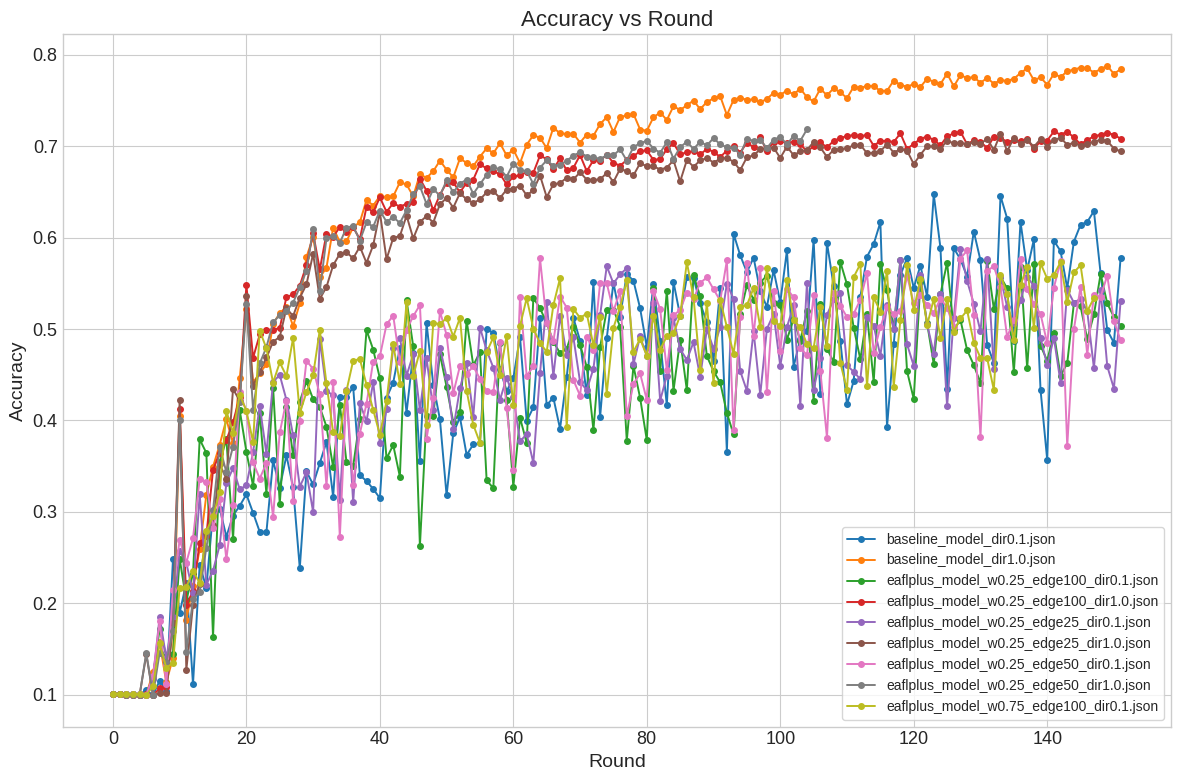

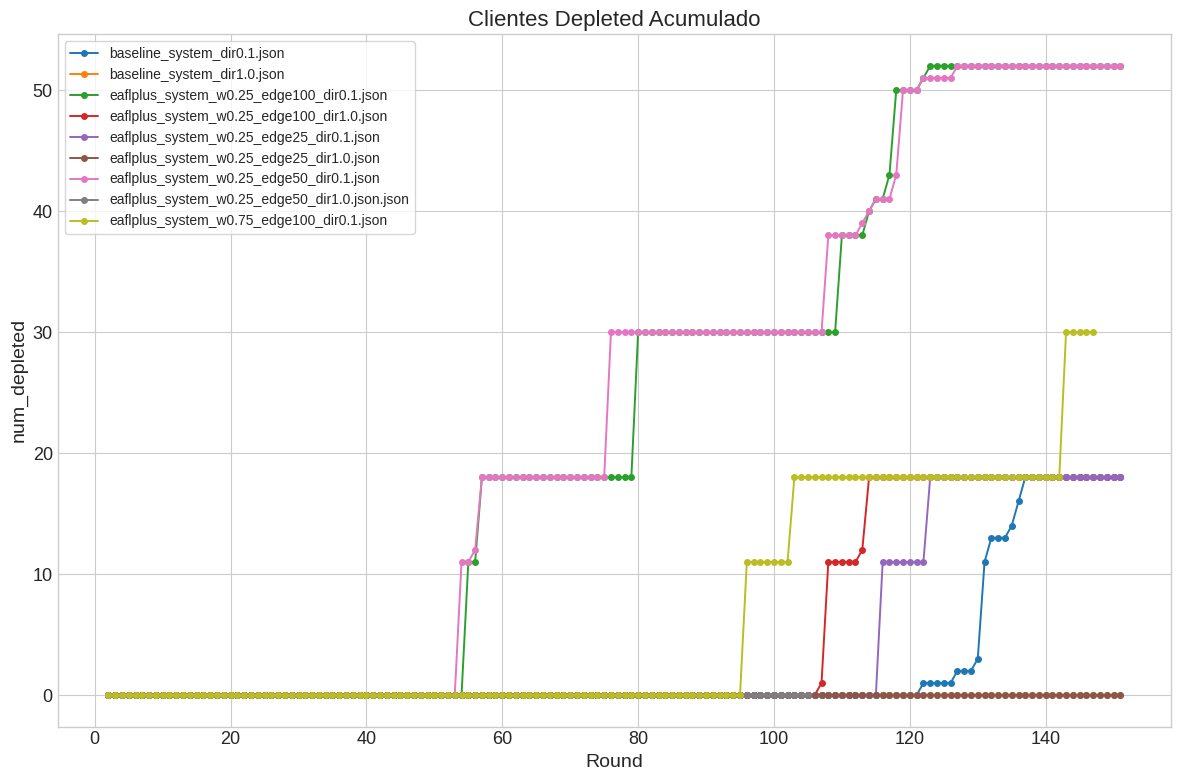

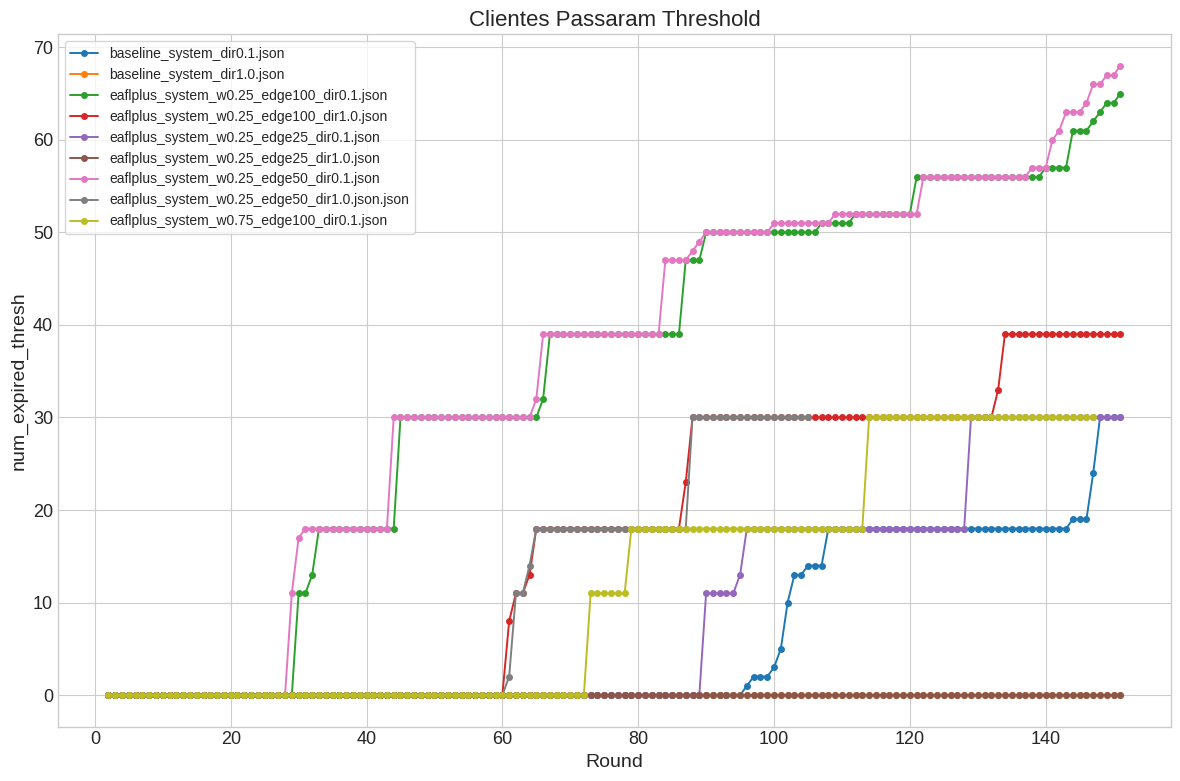

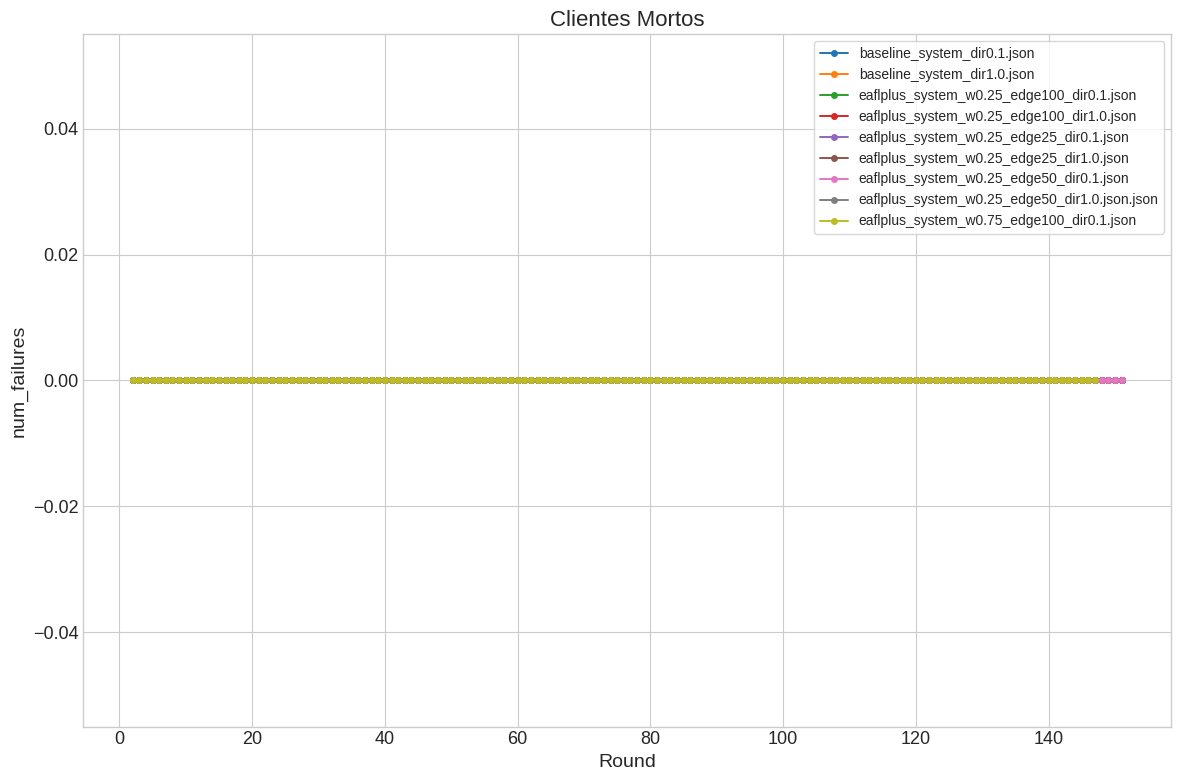

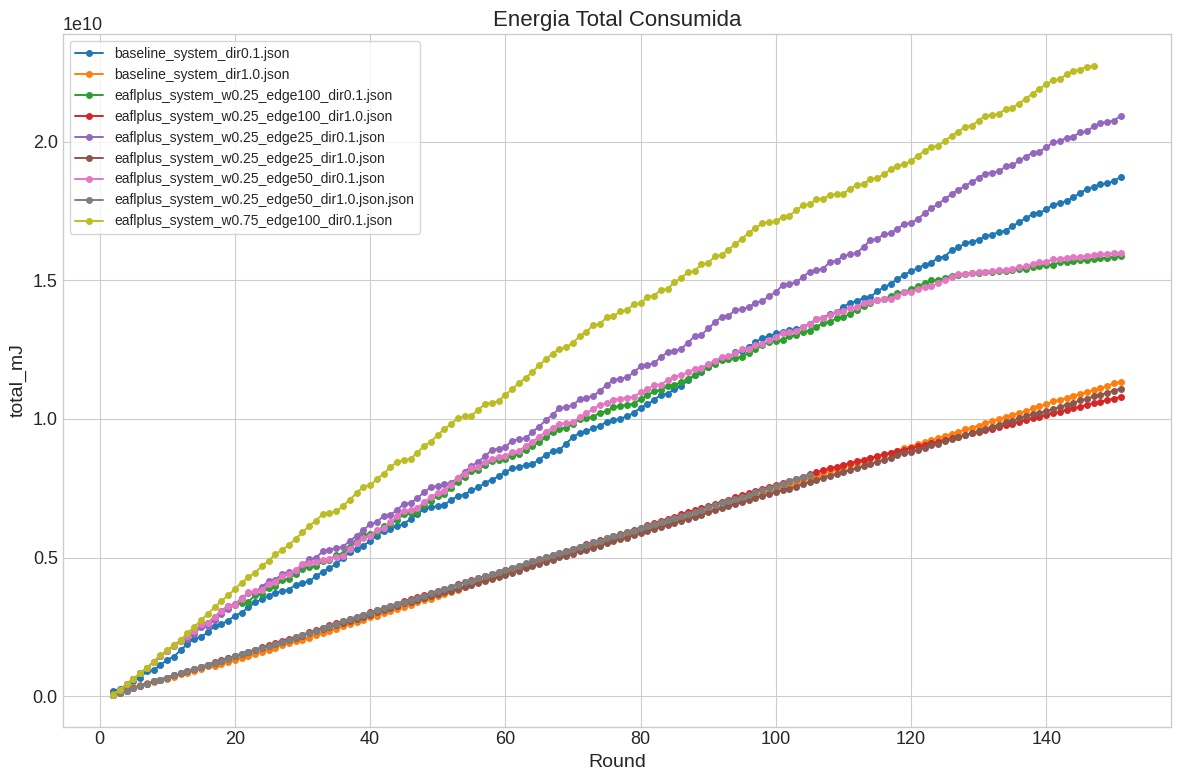

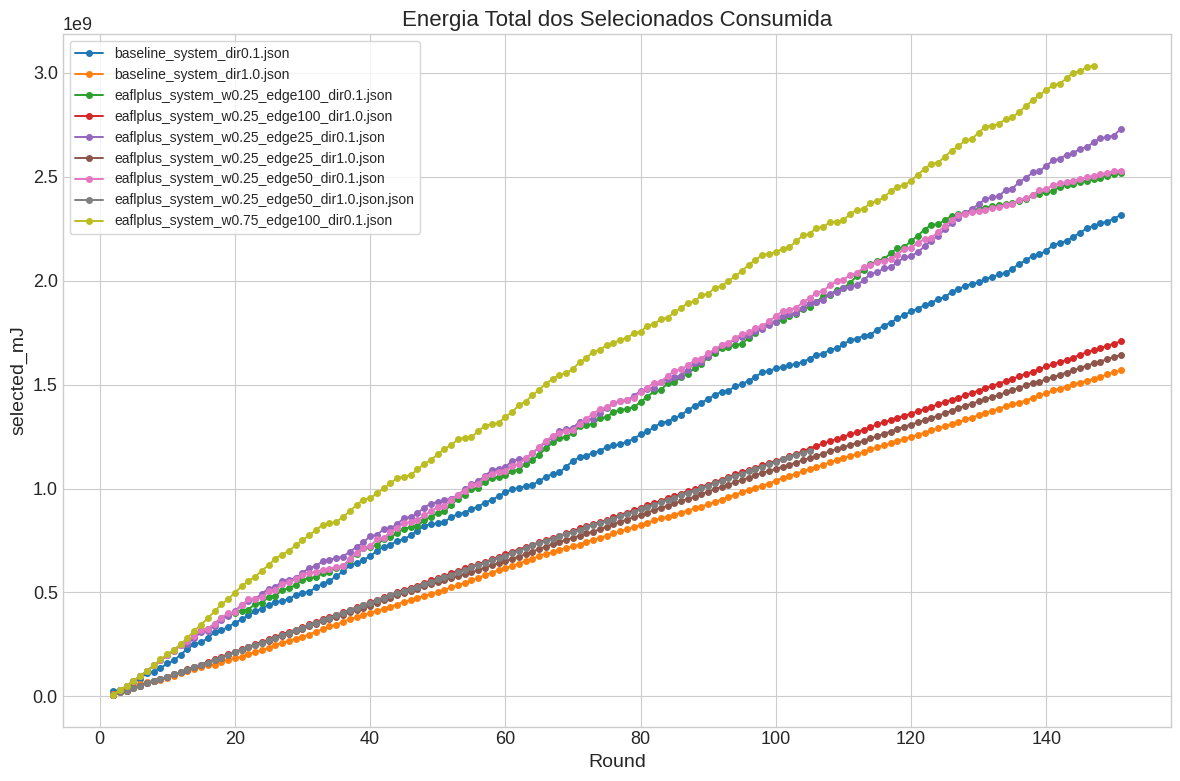

In [2]:
import json
import matplotlib.pyplot as plt
import os

plt.style.use('seaborn-v0_8-whitegrid')

plt.rcParams['figure.figsize'] = (9, 5)
plt.rcParams['lines.linewidth'] = 1.4
plt.rcParams['lines.markersize'] = 4
plt.rcParams['font.size'] = 13
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 10


def load(fname):
    with open(fname) as f:
        return json.load(f)


files = [f for f in os.listdir(".") if f.endswith(".json")]

model_files = [f for f in files if "model" in f.lower()]
system_files = [f for f in files if "system" in f.lower()]

models = [(load(f), f) for f in sorted(model_files)]
systems = [(load(f), f) for f in sorted(system_files)]


import numpy as np

def plot_metric(data_list, title, ylabel, key):
    plt.figure(figsize=(12, 8))

    for data, fname in data_list:
        rounds = sorted(int(k) for k in data.keys())
        values = [data[str(r)][key] for r in rounds]

        if key == "total_mJ" or key == 'selected_mJ':
            values = np.cumsum(values)

        plt.plot(rounds, values, marker="o", label=fname)

    plt.title(title)
    plt.xlabel("Round")
    plt.ylabel(ylabel)
    plt.legend(frameon=True)
    plt.tight_layout()
    plt.show()



plot_metric(models,
           "Accuracy vs Round",
           "Accuracy",
           "cen_accuracy")

plot_metric(systems,
           "Clientes Depleted Acumulado",
           "num_depleted",
           "num_depleted")

plot_metric(systems,
           "Clientes Passaram Threshold",
           "num_expired_thresh",
           "num_expired_thresh")

plot_metric(systems,
           "Clientes Mortos",
           "num_failures",
           "num_failures")

plot_metric(systems,
           "Energia Total Consumida",
           "total_mJ",
           "total_mJ")

plot_metric(systems,
           "Energia Total dos Selecionados Consumida",
           "selected_mJ",
           "selected_mJ")
